# Analyzing Content Trends with Data
## By -  Vrushabh Kasliwal

### About NETFLIX :-

#### Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

## Business Problem :-

#### Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Netflix.csv")

In [ ]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Basic Analysis

In [ ]:
# Total number of rows, columns
data.shape

(8807, 12)

In [ ]:
# Total number of elements
data.size

105684

In [ ]:
# to check data types and Non Null Counts for each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.isnull().sum() #checking for sum of null values for each column.

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
data.describe() #This will analyse the interger column in data frame.

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# getting all the columns with string/mixed type values
str_cols = list(data.columns)
str_cols.remove('release_year')

# removing leading and trailing characters from columns with str type
for i in str_cols:
    data[i] = data[i].str.strip()

#### Changing the data type of date_added column from string to datetime

In [ ]:
# Changing the data type of date_added column from string to datetime
data["date_added"] = pd.to_datetime(data["date_added"])

In [ ]:
# Checking if the data type of column "date_added" is changed or not !!
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


### Handling the missing values.

In [ ]:
# Column which have null values are replaced by "Unknown column name"
data.fillna({"director" : "Unknown director", "cast" : "Unknown cast", "country" : "Unknown country",
            "rating" : "Unknown rating"}, inplace = True)

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
most_recent_entry_date = data["date_added"].max()
data.fillna({"date_added" : most_recent_entry_date}, inplace = True)

/var/folders/q0/swk7rgzd7lnc1_9sk90q3jt00000gn/T/ipykernel_19509/2259906937.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.fillna({"date_added" : most_recent_entry_date}, inplace = True)


#### Additional data cleaning
    The missing duration are all movies by Louis C.K, Normally we would like to replace it mean duration table but here it seams like actual duration was input in rating column for these three rows, So the right path will be to move the rating data into duration and make the rating information "unknown rating" for these three rows.

In [ ]:
# Checking the null rows of duration column.
data[data["duration"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
# Check to make sure there is no other content with the same director to avoid accidental overwritting.
data[data["director"] == "Louis C.K."]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
# Overwrite and check in duration column.
data.loc[data["director"] == "Louis C.K.", "duration"] = data["rating"]  # Overwritting

data[data["director"] == "Louis C.K."]  # Checking

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
# Overwrite and replace those 3 rating rows with "Unknown rating"
data.loc[data["director"] == "Louis C.K.", "rating"] = "Unknown rating"  # Overwritting

data[data["director"] == "Louis C.K."] # Checking

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unknown rating,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unknown rating,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unknown rating,66 min,Movies,The comic puts his trademark hilarious/thought...


<Axes: >

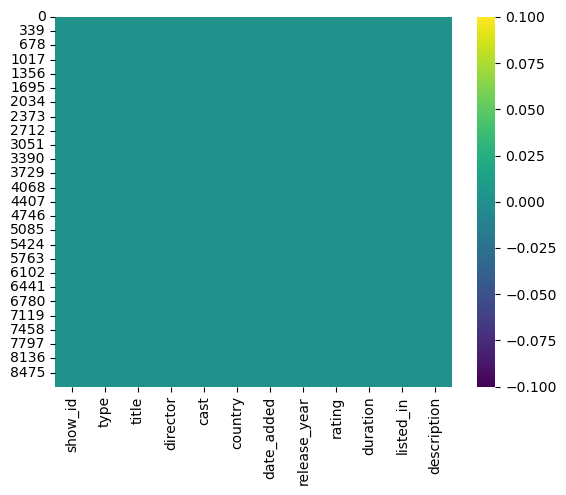

In [ ]:
# Checking graphically if any null values are present in any column !!
sns.heatmap(data.isnull(),cmap = 'viridis')

# 1. Find the counts of each categorical variable both using graphical and non-graphical analysis.

### Un-nesting Columns:-
    Some useful columns like("country", "director", "cast", "listed_in") are having having coma separated values so un-nesting them will help in better analysis result.

#### Country explode

In [ ]:
country_explode = data[["show_id", "country"]].set_index(["show_id"]).apply(lambda x: x.str.split(",").explode()).reset_index()

In [ ]:
country_explode.head(10) #We can see for s8 got 3 rows, so our country column is un-nested.

,show_id,country
0,s1,United States
1,s2,South Africa
2,s3,Unknown country
3,s4,Unknown country
4,s5,India
5,s6,Unknown country
6,s7,Unknown country
7,s8,United States
8,s8,Ghana
9,s8,Burkina Faso


In [ ]:
country_explode["country"].value_counts()

United States      3211
India              1008
Unknown country     831
United Kingdom      628
 United States      479
                   ... 
 Ecuador              1
Iran                  1
Cyprus                1
 Mongolia             1
 Montenegro           1
Name: country, Length: 198, dtype: int64

In [ ]:
country_explode["country"] = country_explode["country"].str.strip() #Deleting the leading/trailing spaces.

In [ ]:
country_explode["country"].value_counts() # Checking the result

United States      3690
India              1046
Unknown country     831
United Kingdom      806
Canada              445
                   ... 
Ecuador               1
Armenia               1
Mongolia              1
Bahamas               1
Montenegro            1
Name: country, Length: 124, dtype: int64

In [ ]:
country_explode.shape

(10850, 2)

In [ ]:
country_explode["country"].unique() #List of all unique countries in our data frame.

array(['United States', 'South Africa', 'Unknown country', 'India',
       'Ghana', 'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia',
       'Czech Republic', 'Mexico', 'Turkey', 'Australia', 'France',
       'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain',
       'Belgium', 'South Korea', 'Singapore', 'Italy', 'Romania',
       'Argentina', 'Venezuela', 'Hong Kong', 'Russia', '', 'Ireland',
       'Nepal', 'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark',
       'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary',
       'Sweden', 'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'Kenya', 'Chile', 'Luxembourg',
       'Cambodia', 'Bangladesh', 'Portugal', 'Cayman Islands', 'Senegal',
       'Serbia', 'Ma

In [ ]:
country_explode["country"].nunique() # Count of unique countries.

124

In [ ]:
country_explode["country"].max() # Country starting with max ord

'Zimbabwe'

In [ ]:
country_explode["country"].min() # Country starting with min ord, the result says their are some unwanted rows.

''

In [ ]:
country_explode[country_explode["country"] == '']

,show_id,country
241,s194,
447,s366,
1458,s1193,
2714,s2225,
5556,s4654,
7068,s5926,
8470,s7008,


In [ ]:
country_explode.drop(country_explode[country_explode["country"] == ''].index, axis = 0, inplace = True)

In [ ]:
country_explode.shape # Checking if code worked.

(10843, 2)

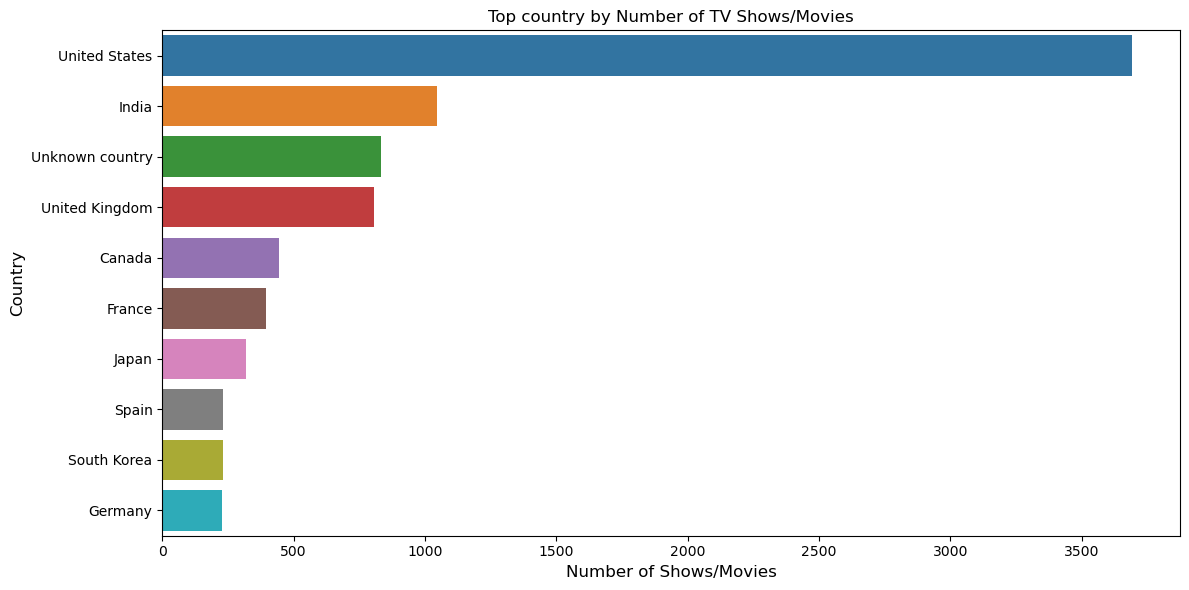

In [ ]:
# Graphical representation of top countries by number of shows/movies.
plt.figure(figsize = (12, 6))  # Set the figure size
sns.countplot(data = country_explode, y ='country', order = country_explode['country'].value_counts().index[0:10])
plt.ylabel('Country', fontsize = 12)
plt.xlabel('Number of Shows/Movies', fontsize = 12)
plt.title('Top country by Number of TV Shows/Movies')
plt.tight_layout()

#### Director explode

In [ ]:
director_explode = data[["show_id", "director"]].set_index(["show_id"]).apply(lambda x: x.str.split(",").explode()).reset_index()

In [ ]:
director_explode.head(10) #We can see for s7 got 2 rows, so our country column is un-nested.

,show_id,director
0,s1,Kirsten Johnson
1,s2,Unknown director
2,s3,Julien Leclercq
3,s4,Unknown director
4,s5,Unknown director
5,s6,Mike Flanagan
6,s7,Robert Cullen
7,s7,José Luis Ucha
8,s8,Haile Gerima
9,s9,Andy Devonshire


In [ ]:
director_explode["director"] = director_explode["director"].str.strip() #Deleting the leading/trailing spaces.

In [ ]:
director_explode[director_explode["director"] == ""]

,show_id,director


In [ ]:
director_explode["director"].unique()

array(['Kirsten Johnson', 'Unknown director', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [ ]:
director_explode["director"].nunique()

4994

In [ ]:
director_explode.shape

(9612, 2)

In [ ]:
director_explode["director"].value_counts()

Unknown director    2634
Rajiv Chilaka         22
Jan Suter             21
Raúl Campos           19
Suhas Kadav           16
                    ... 
Raymie Muzquiz         1
Stu Livingston         1
Joe Menendez           1
Eric Bross             1
Mozez Singh            1
Name: director, Length: 4994, dtype: int64

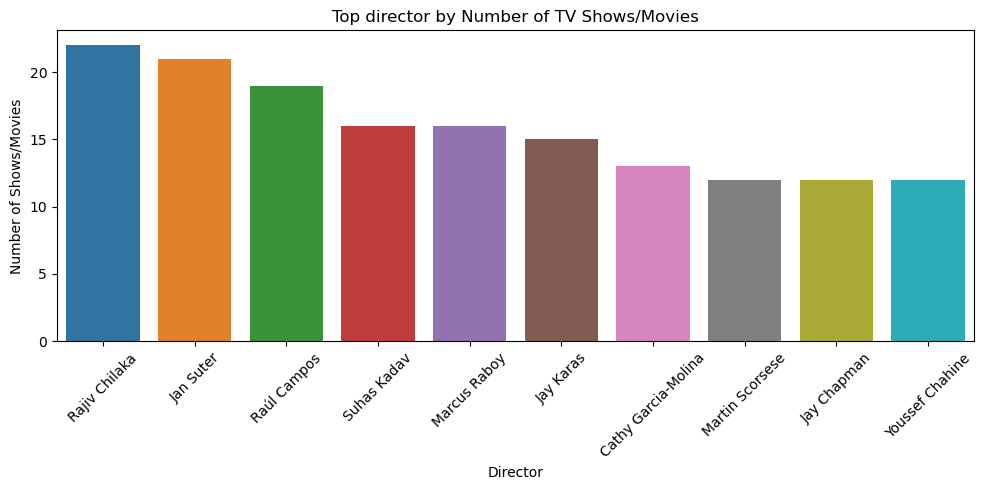

In [ ]:
# Graphical representation of top directors by number of shows/movies.
plt.figure(figsize = (10, 5))  # Set the figure size
sns.countplot(data = director_explode, x = 'director', order = director_explode['director'].value_counts().index[1:11])
# we are ignoring 1st index as it is of unknown director.
plt.xticks(rotation = 45)  # Rotate x-axis labels for better readability
plt.xlabel('Director')
plt.ylabel('Number of Shows/Movies')
plt.title('Top director by Number of TV Shows/Movies')
plt.tight_layout()

#### cast explode

In [ ]:
cast_explode = data[["show_id", "cast"]].set_index(["show_id"]).apply(lambda x: x.str.split(",").explode()).reset_index()

In [ ]:
cast_explode.head() #We can see for s2 got 4 rows, so our country column is un-nested.

,show_id,cast
0,s1,Unknown cast
1,s2,Ama Qamata
2,s2,Khosi Ngema
3,s2,Gail Mabalane
4,s2,Thabang Molaba


In [ ]:
cast_explode["cast"] = cast_explode["cast"].str.strip() #Deleting the leading/trailing spaces.

In [ ]:
director_explode[director_explode["director"] == ""]

,show_id,director


In [ ]:
cast_explode.shape

(64951, 2)

In [ ]:
cast_explode["cast"].unique()

array(['Unknown cast', 'Ama Qamata', 'Khosi Ngema', ..., 'Malkeet Rauni',
       'Anita Shabdish', 'Chittaranjan Tripathy'], dtype=object)

In [ ]:
cast_explode["cast"].nunique()

36440

In [ ]:
cast_explode["cast"].value_counts()

Unknown cast               825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: cast, Length: 36440, dtype: int64

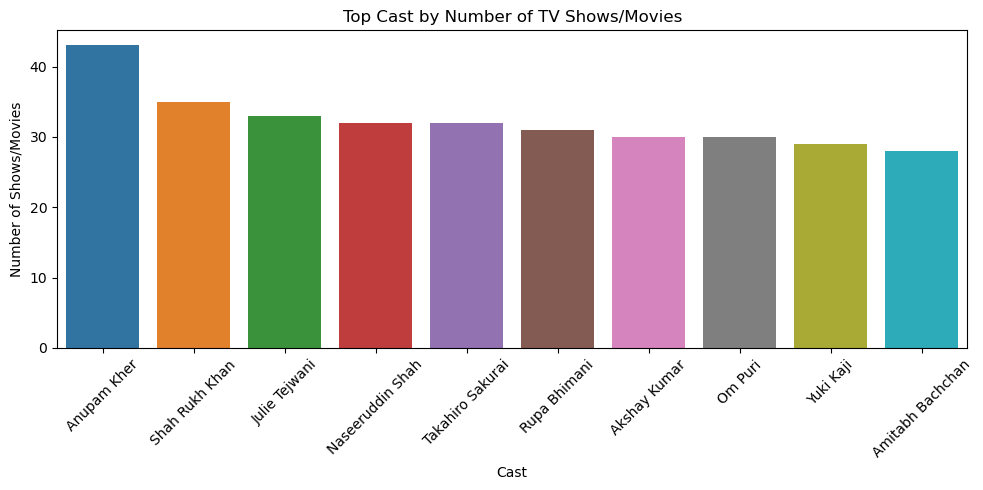

In [ ]:
# Graphical representation of top cast by number of shows/movies.
plt.figure(figsize = (10, 5))  # Set the figure size
sns.countplot(data = cast_explode, x = 'cast', order = cast_explode['cast'].value_counts().index[1:11])
# we are ignoring 1st index as it is of unknown cast.
plt.xticks(rotation = 45)  # Rotate x-axis labels for better readability
plt.xlabel('Cast')
plt.ylabel('Number of Shows/Movies')
plt.title('Top Cast by Number of TV Shows/Movies')
plt.tight_layout()

#### listed_in explode

In [ ]:
listed_in_explode = data[["show_id", "listed_in"]].set_index(["show_id"]).apply(lambda x: x.str.split(",").explode()).reset_index()

In [ ]:
listed_in_explode.head() #We can see for s2 got 3 rows, so our country column is un-nested.

,show_id,listed_in
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows


In [ ]:
listed_in_explode["listed_in"] = listed_in_explode["listed_in"].str.strip() #Deleting the leading/trailing spaces.

In [ ]:
listed_in_explode[listed_in_explode["listed_in"] == ""]

,show_id,listed_in


In [ ]:
listed_in_explode.shape

(19323, 2)

In [ ]:
listed_in_explode["listed_in"].nunique()

42

In [ ]:
listed_in_explode["listed_in"].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [ ]:
listed_in_explode["listed_in"].value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

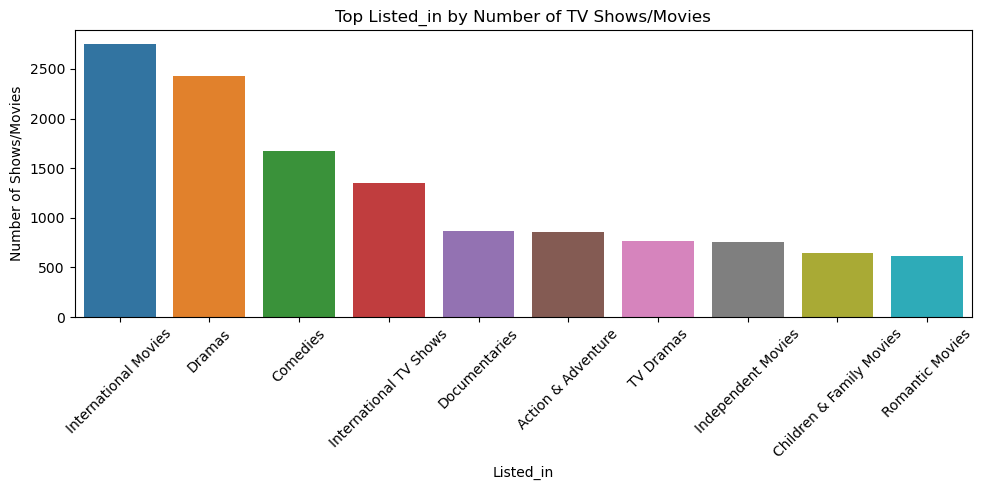

In [ ]:
# Graphical representation of top listed_in by number of shows/movies.
plt.figure(figsize = (10, 5))  # Set the figure size
sns.countplot(data = listed_in_explode, x = 'listed_in', order = listed_in_explode['listed_in'].value_counts().index[0:10])
plt.xticks(rotation = 45)  # Rotate x-axis labels for better readability
plt.xlabel('Listed_in')
plt.ylabel('Number of Shows/Movies')
plt.title('Top Listed_in by Number of TV Shows/Movies')
plt.tight_layout()

In [ ]:
# Let's look at type of shows shows netflix has produced & visualize it with graph.
data["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

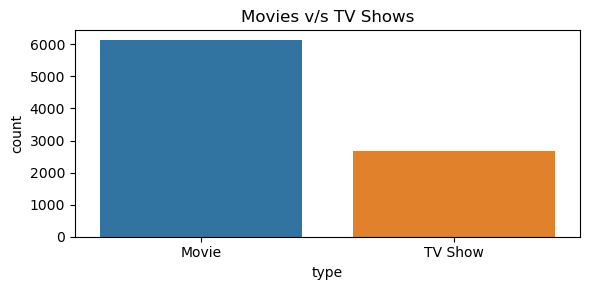

In [ ]:
# Graphical representation between Movies and TV shows
plt.figure(figsize = (6,3))
sns.countplot(data = data, x = "type")
plt.title("Movies v/s TV Shows")
plt.tight_layout()

In [ ]:
# Analysis on "rating" column
data["rating"].value_counts()

TV-MA             3207
TV-14             2160
TV-PG              863
R                  799
PG-13              490
TV-Y7              334
TV-Y               307
PG                 287
TV-G               220
NR                  80
G                   41
Unknown rating       7
TV-Y7-FV             6
NC-17                3
UR                   3
Name: rating, dtype: int64

In [ ]:
data["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Unknown rating', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

In [ ]:
data["rating"].nunique()

15

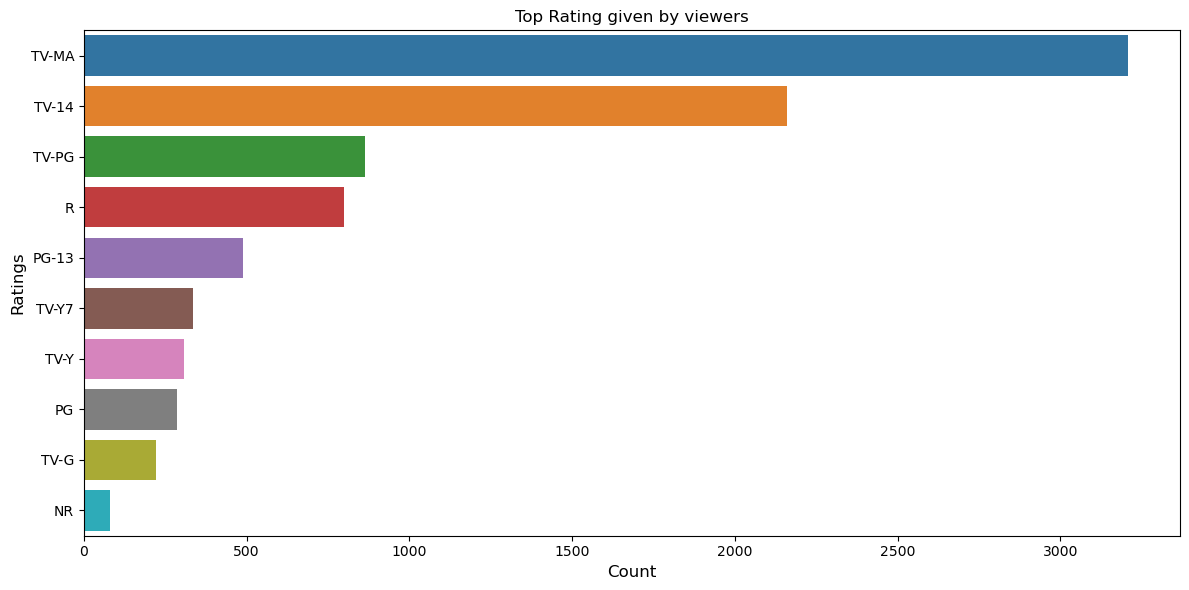

In [ ]:
# Graphical representation of "rating" column
plt.figure(figsize = (12,6))
sns.countplot(data = data, y = "rating", order = data["rating"].value_counts().index[0:10])
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Ratings', fontsize = 12)
plt.title('Top Rating given by viewers', fontsize = 12)
plt.tight_layout()

#### From above analysis it is clear maximum TV-MA rating content is available on netflix (i.e adult content), followed by TV-14 rating content.

In [ ]:
# Analysis on the "release_year" column
data["release_year"].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
data["release_year"].max()

2021

In [ ]:
data["release_year"].min()

1925

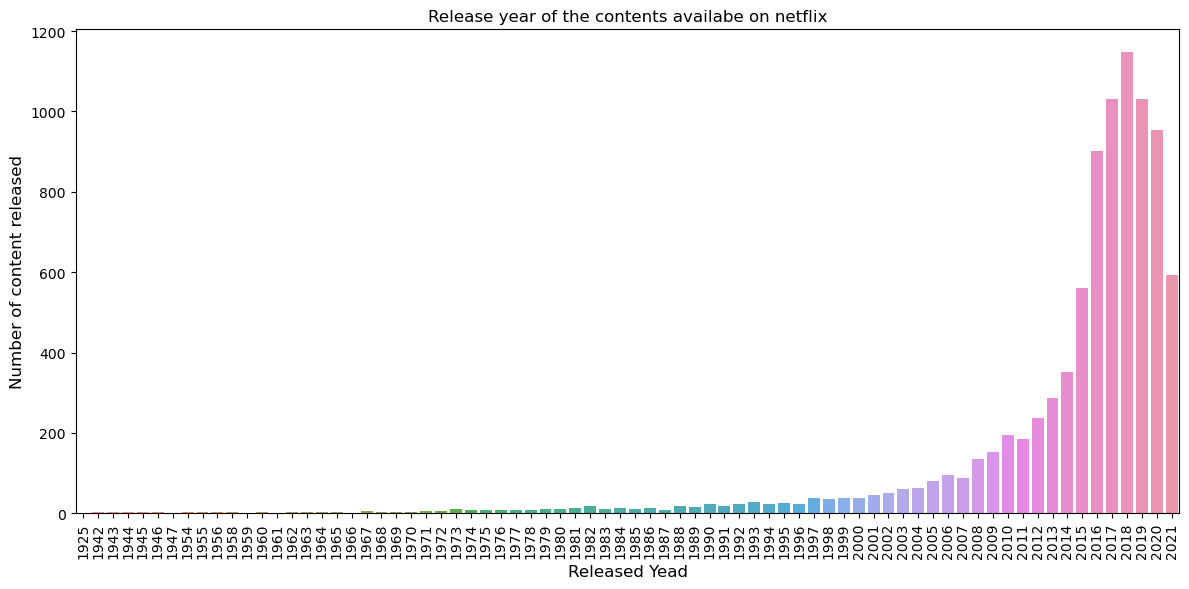

In [ ]:
# Graphical representation of "release_year" column
plt.figure(figsize = (12,6))
sns.countplot(data = data, x = "release_year")
plt.xlabel('Released Yead', fontsize = 12)
plt.ylabel('Number of content released', fontsize = 12)
plt.title('Release year of the contents availabe on netflix', fontsize = 12)
plt.xticks(rotation = 90)
plt.tight_layout()

In [ ]:
# Analysis on "date_added" column.
data["date_added"].min()

Timestamp('2008-01-01 00:00:00')

In [ ]:
data["date_added"].max()

Timestamp('2021-09-25 00:00:00')

According to the data set, The first content added by Netflix was on "2008-01-01" and last content added was on "2021-09-25"

In [ ]:
# Let's find in which year Netflix added maximum content
data["date_added"].dt.year.value_counts()

2019    2016
2020    1879
2018    1649
2021    1508
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: date_added, dtype: int64

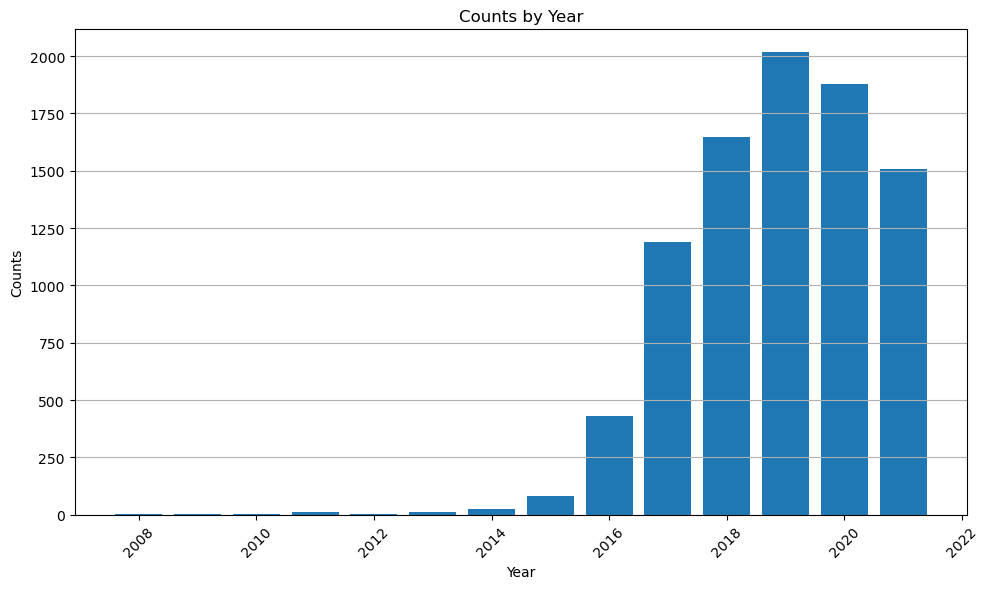

In [ ]:
# Graphical Representation of "date_added" column or YoY analysis of "date_added" column.
tdf = data["date_added"].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(tdf.index, tdf.values)
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Counts by Year')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Comparison of tv shows vs. movies.

In [ ]:
# Creating a new temporary dataframe by merging country_explode & main data, because in our main data their were
# coma seprated values present in country.
tdf1 = country_explode.merge(data[['show_id','type']], how='left', left_on='show_id',right_on = 'show_id')
tdf1.head()

,show_id,country,type
0,s1,United States,Movie
1,s2,South Africa,TV Show
2,s3,Unknown country,TV Show
3,s4,Unknown country,TV Show
4,s5,India,TV Show


In [ ]:
tdf1.shape

(10843, 3)

In [ ]:
# Finding number of movies produced by each country.(Method 1)
tdf1[tdf1["type"] == "Movie"].groupby("country").count().sort_values(by = "show_id", ascending = False)

,show_id,type
country,,
United States,2752,2752
India,962,962
United Kingdom,534,534
Unknown country,440,440
Canada,319,319
...,...,...
Mozambique,1,1
Nicaragua,1,1
Palestine,1,1


In [ ]:
# # Finding number of movies produced by each country.(Method 2)
mov_data = tdf1[tdf1["type"] == "Movie"]
mov_data["country"].value_counts()

United States      2752
India               962
United Kingdom      534
Unknown country     440
Canada              319
                   ... 
Ecuador               1
Armenia               1
Mongolia              1
Bahamas               1
Montenegro            1
Name: country, Length: 118, dtype: int64

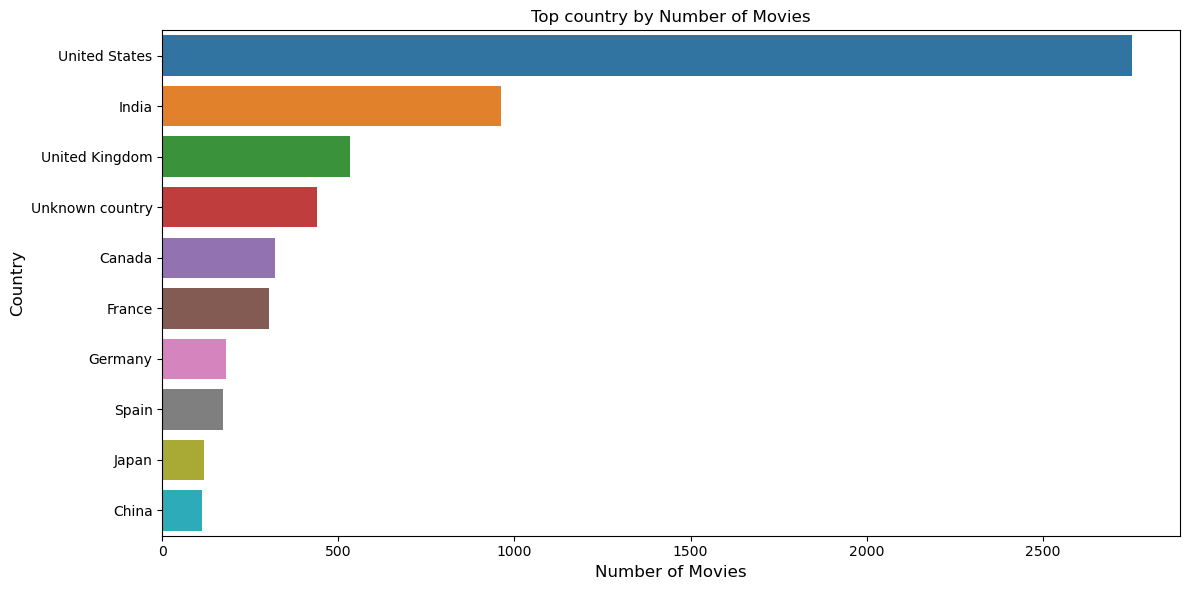

In [ ]:
# Graphical representation of movies by country for top 10
plt.figure(figsize = (12, 6))  # Set the figure size
sns.countplot(data = mov_data, y ='country', order = mov_data['country'].value_counts().index[0:10])
plt.ylabel('Country', fontsize = 12)
plt.xlabel('Number of Movies', fontsize = 12)
plt.title('Top country by Number of Movies')
plt.tight_layout()

In [ ]:
# Finding number of TV_Shows produced by each country.
tdf1[tdf1["type"] == "TV Show"].groupby("country").count().sort_values(by = "show_id", ascending = False)

,show_id,type
country,,
United States,938,938
Unknown country,391,391
United Kingdom,272,272
Japan,199,199
South Korea,170,170
...,...,...
Switzerland,1,1
Hungary,1,1
Malta,1,1


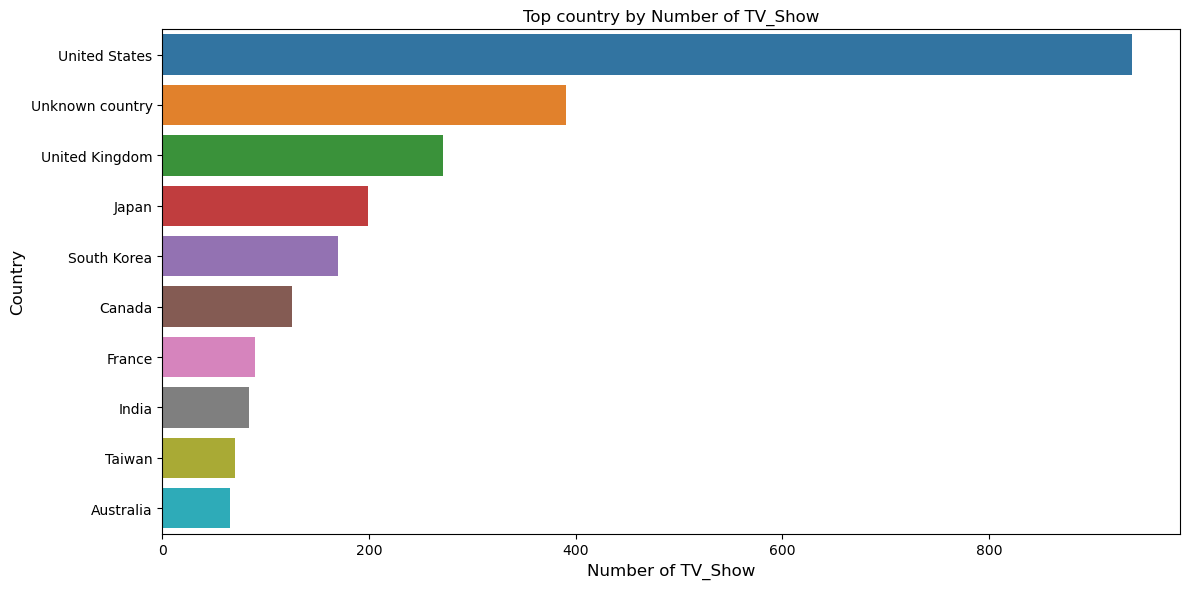

In [ ]:
# Graphical representation of TV_Shows by country for top 10
tv_show_data = tdf1[tdf1["type"] == "TV Show"]
tv_show_data["country"].value_counts()

plt.figure(figsize = (12, 6))  # Set the figure size
sns.countplot(data = tv_show_data, y ='country', order = tv_show_data['country'].value_counts().index[0:10])
plt.ylabel('Country', fontsize = 12)
plt.xlabel('Number of TV_Show', fontsize = 12)
plt.title('Top country by Number of TV_Show')
plt.tight_layout()

In [ ]:
mov_data.shape

(7813, 3)

In [ ]:
tv_show_data.shape

(3030, 3)

In [ ]:
tdf1.shape

(10843, 3)

# 3. What is the best time to launch a Movie or TV show?

## Best week to release a movie.

In [ ]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
# Creating a new data frame for movies.
movie_data = data[data["type"] == "Movie"]

In [ ]:
# Converting the "date_added" column to datetime.
movie_data['date_added'] = pd.to_datetime(movie_data['date_added'])

# Creating a new column("week_number") in movie_data
movie_data['week_number'] = movie_data['date_added'].dt.week


/var/folders/q0/swk7rgzd7lnc1_9sk90q3jt00000gn/T/ipykernel_19509/519617579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['date_added'] = pd.to_datetime(movie_data['date_added'])
/var/folders/q0/swk7rgzd7lnc1_9sk90q3jt00000gn/T/ipykernel_19509/519617579.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  movie_data['week_number'] = movie_data['date_added'].dt.week
/var/folders/q0/swk7rgzd7lnc1_9sk90q3jt00000gn/T/ipykernel_19509/519617579.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [ ]:
# we can see new week column has been created in our movie_data dataframe.
movie_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_number
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",38


In [ ]:
# Finding which is the best time to release a movie.(Method 1)
movie_data.groupby("week_number")["show_id"].count().sort_values(ascending = False)

week_number
1     316
44    243
40    215
9     207
26    195
35    189
31    185
13    174
18    173
27    154
22    146
48    139
5     135
14    124
16    124
50    119
30    116
11    115
37    114
23    112
39    111
17    109
10    107
7     106
33    105
34    102
25    101
15    100
36     97
49     95
29     94
42     90
28     89
24     89
38     88
43     88
51     86
20     85
47     85
41     84
46     83
3      81
52     80
2      78
21     76
32     73
19     73
8      72
12     67
6      64
45     61
53     61
4      56
Name: show_id, dtype: int64

In [ ]:
# Finding which is the best time to release a movie.(Method 2)
movie_data["week_number"].value_counts()

1     316
44    243
40    215
9     207
26    195
35    189
31    185
13    174
18    173
27    154
22    146
48    139
5     135
16    124
14    124
50    119
30    116
11    115
37    114
23    112
39    111
17    109
10    107
7     106
33    105
34    102
25    101
15    100
36     97
49     95
29     94
42     90
24     89
28     89
43     88
38     88
51     86
47     85
20     85
41     84
46     83
3      81
52     80
2      78
21     76
19     73
32     73
8      72
12     67
6      64
45     61
53     61
4      56
Name: week_number, dtype: int64

#### Maximum movies with count 316 were released in 1st week, followed by week 44 with count 243.
#### This clearly means the best week to release a movie is 1st week of the year.

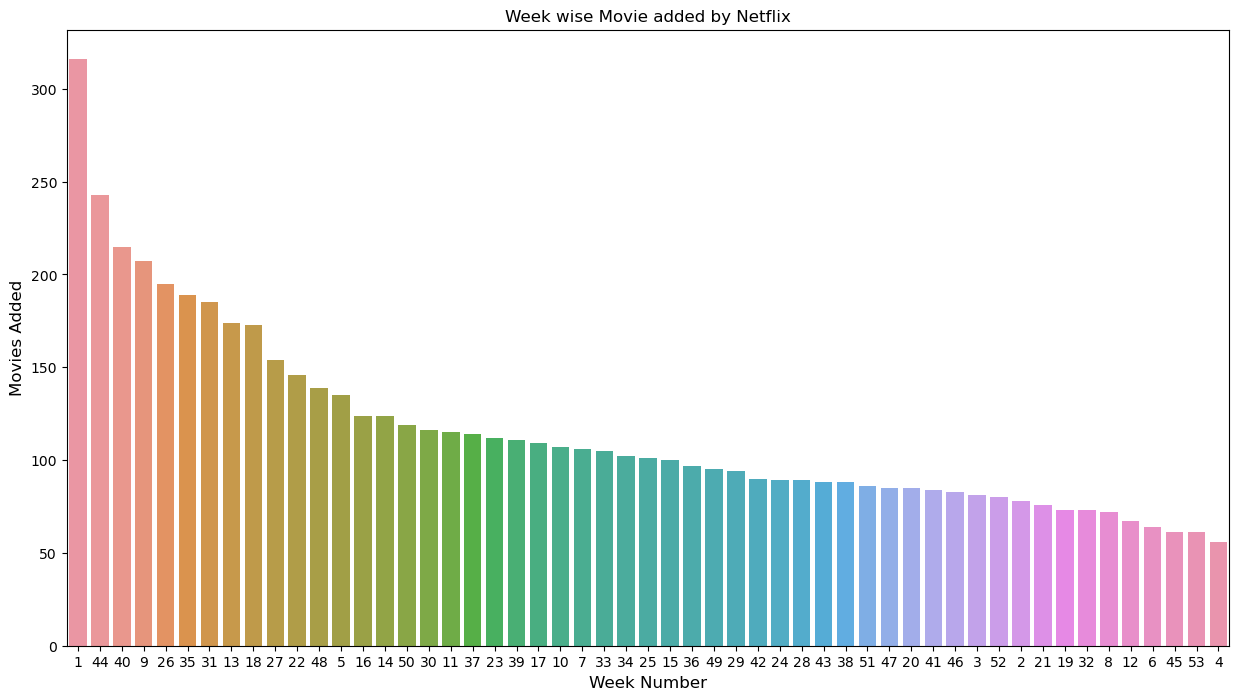

In [ ]:
# Graphical representation of best week to release a movie.
plt.figure(figsize = (15,8))
sns.countplot(data = movie_data, x = "week_number", order = movie_data["week_number"].value_counts().index)
plt.title("Week wise Movie added by Netflix", fontsize = 12)
plt.xlabel("Week Number", fontsize = 12)
plt.ylabel("Movies Added", fontsize = 12)
plt.show()

## Best week to release a TV Show.

In [ ]:
# Creating a new data frame for TV Shows.
tv_data = data[data["type"] == "TV Show"]

In [ ]:
# Converting the "date_added" column to datetime.
tv_data['date_added'] = pd.to_datetime(tv_data['date_added'])

# Creating a new column("week_number") in tv_data
tv_data['week_number'] = tv_data['date_added'].dt.week


/var/folders/q0/swk7rgzd7lnc1_9sk90q3jt00000gn/T/ipykernel_19509/3555089385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data['date_added'] = pd.to_datetime(tv_data['date_added'])
/var/folders/q0/swk7rgzd7lnc1_9sk90q3jt00000gn/T/ipykernel_19509/3555089385.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  tv_data['week_number'] = tv_data['date_added'].dt.week
/var/folders/q0/swk7rgzd7lnc1_9sk90q3jt00000gn/T/ipykernel_19509/3555089385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
# we can see new week column has been created in our tv_data dataframe.
tv_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_number
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,38
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",38


In [ ]:
# Finding which is the best week to release a TV Show . (Method 1)
tv_data.groupby("week_number")["show_id"].count().sort_values(ascending = False)

week_number
27    86
31    83
13    76
44    75
24    75
35    74
5     73
26    73
40    72
50    70
37    69
18    61
38    61
48    60
22    60
1     56
39    55
52    52
15    52
46    51
51    51
32    49
14    49
11    48
33    48
9     47
29    46
20    46
42    45
36    45
49    45
17    45
30    44
53    43
19    43
12    42
25    42
28    41
7     41
21    41
34    41
23    39
8     38
45    37
16    36
47    35
6     33
4     32
3     32
41    32
2     30
43    28
10    28
Name: show_id, dtype: int64

In [ ]:
# Finding which is the best week to release a TV Show .(Method 2)
tv_data["week_number"].value_counts()

27    86
31    83
13    76
44    75
24    75
35    74
5     73
26    73
40    72
50    70
37    69
38    61
18    61
22    60
48    60
1     56
39    55
52    52
15    52
51    51
46    51
32    49
14    49
11    48
33    48
9     47
20    46
29    46
36    45
17    45
42    45
49    45
30    44
53    43
19    43
25    42
12    42
34    41
21    41
7     41
28    41
23    39
8     38
45    37
16    36
47    35
6     33
4     32
41    32
3     32
2     30
10    28
43    28
Name: week_number, dtype: int64

#### Maximum TV Shows with count 86 were released in 27th week, followed by week 31st with count 83.
#### This clearly means the best time to release a TV Show is 27th week of the year.

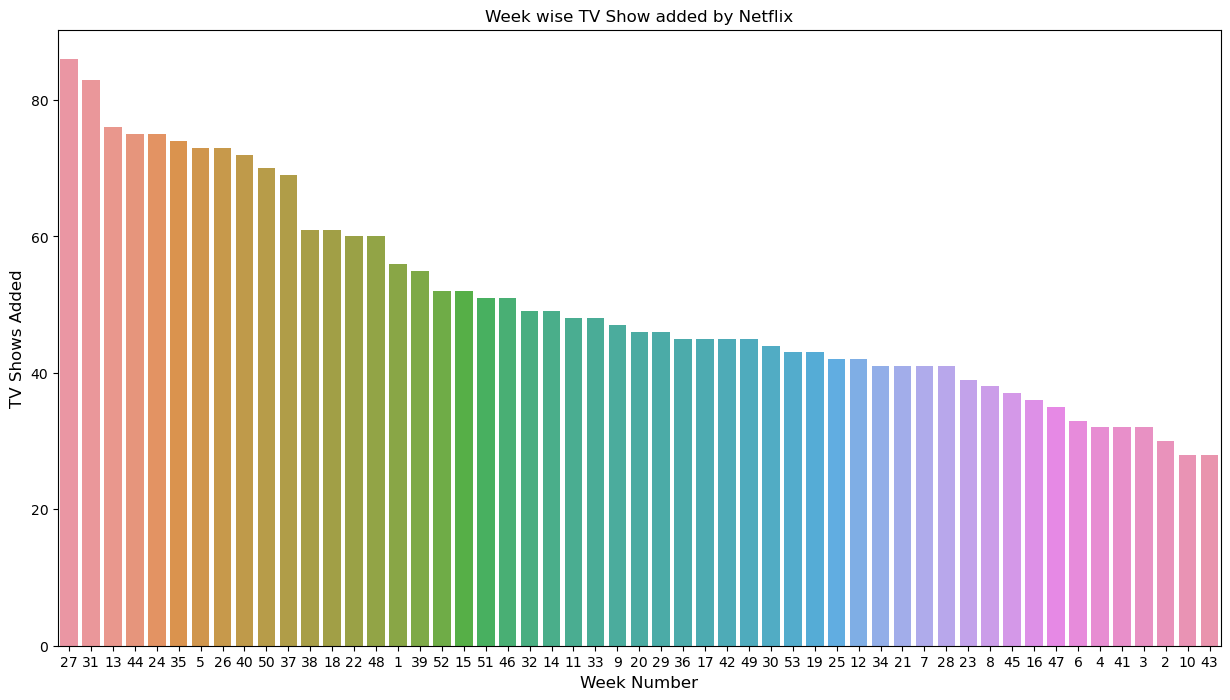

In [ ]:
# Graphical representation of best week to release a TV Show.
plt.figure(figsize = (15,8))
sns.countplot(data = tv_data, x = "week_number", order = tv_data["week_number"].value_counts().index)
plt.title("Week wise TV Show added by Netflix", fontsize = 12)
plt.xlabel("Week Number", fontsize = 12)
plt.ylabel("TV Shows Added", fontsize = 12)
plt.show()

## Best month to release a Movie.

In [ ]:
# Creating a new column("week_number") in movie_data
movie_data['month_number'] = movie_data['date_added'].dt.month

/var/folders/q0/swk7rgzd7lnc1_9sk90q3jt00000gn/T/ipykernel_19509/825829430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['month_number'] = movie_data['date_added'].dt.month


In [ ]:
# Checking new column has been created.
movie_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_number,month_number
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",38,9


In [ ]:
# Finding which is the best Month to release a movie.(Method 1)
movie_data.groupby("month_number")["show_id"].count().sort_values(ascending = False)

month_number
7     565
4     550
12    547
1     546
10    545
3     529
8     519
9     519
11    498
6     492
5     439
2     382
Name: show_id, dtype: int64

#### Maximum movies with count 565 were released in 7th Month, followed by 4th Month with count 550.
#### This clearly means the best Month to release a movie is 7th Month of the year.

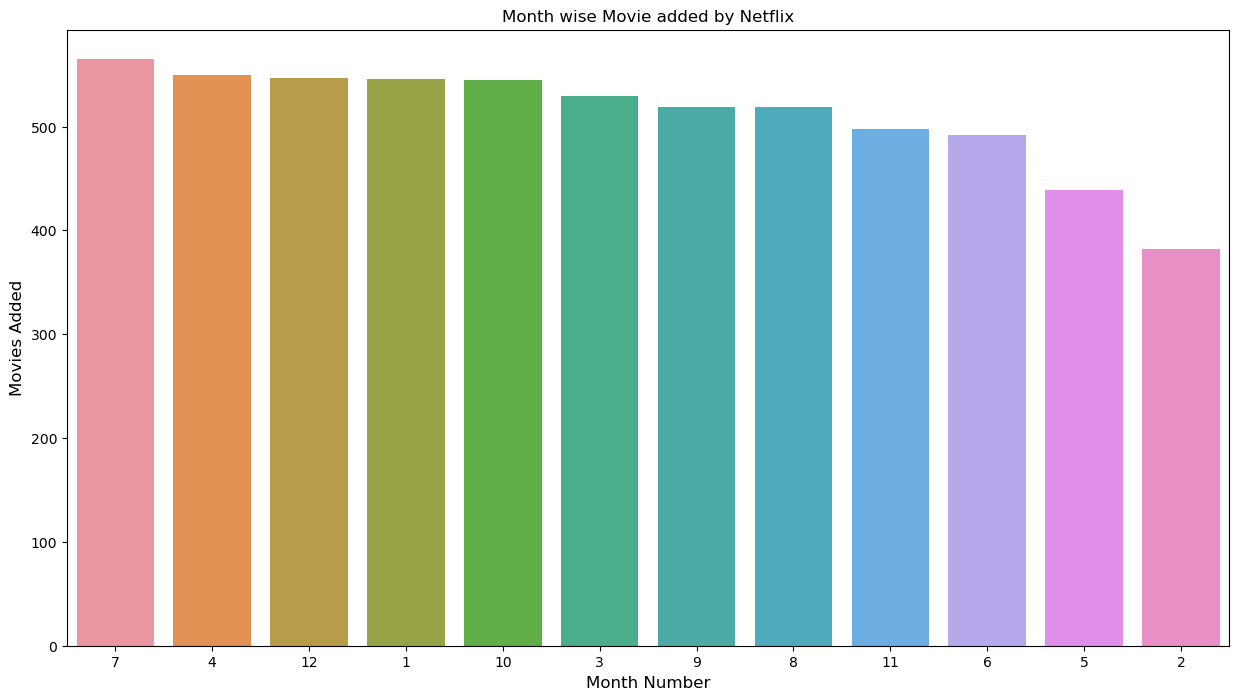

In [ ]:
# Graphical representation of best Month to release a movie.
plt.figure(figsize = (15,8))
sns.countplot(data = movie_data, x = "month_number", order = movie_data["month_number"].value_counts().index)
plt.title("Month wise Movie added by Netflix", fontsize = 12)
plt.xlabel("Month Number", fontsize = 12)
plt.ylabel("Movies Added", fontsize = 12)
plt.show()

## Best month to release a TV Show

In [ ]:
# Creating a new column("month_number") in tv_data
tv_data['month_number'] = tv_data['date_added'].dt.month

/var/folders/q0/swk7rgzd7lnc1_9sk90q3jt00000gn/T/ipykernel_19509/3599260108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data['month_number'] = tv_data['date_added'].dt.month


In [ ]:
# Checking new column has been created.
tv_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_number,month_number
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,38,9
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",38,9


In [ ]:
# Finding which is the best month to release a TV Show . (Method 1)
tv_data.groupby("month_number")["show_id"].count().sort_values(ascending = False)

month_number
12    266
7     262
9     261
6     236
8     236
10    215
4     214
3     213
11    207
5     193
1     192
2     181
Name: show_id, dtype: int64

#### Maximum TV Shows with count 266 were released in 12th Month , followed by 7th Month with count 262 ,
#### This clearly means the best time to release a TV Show is 12th/7th Month of the year.

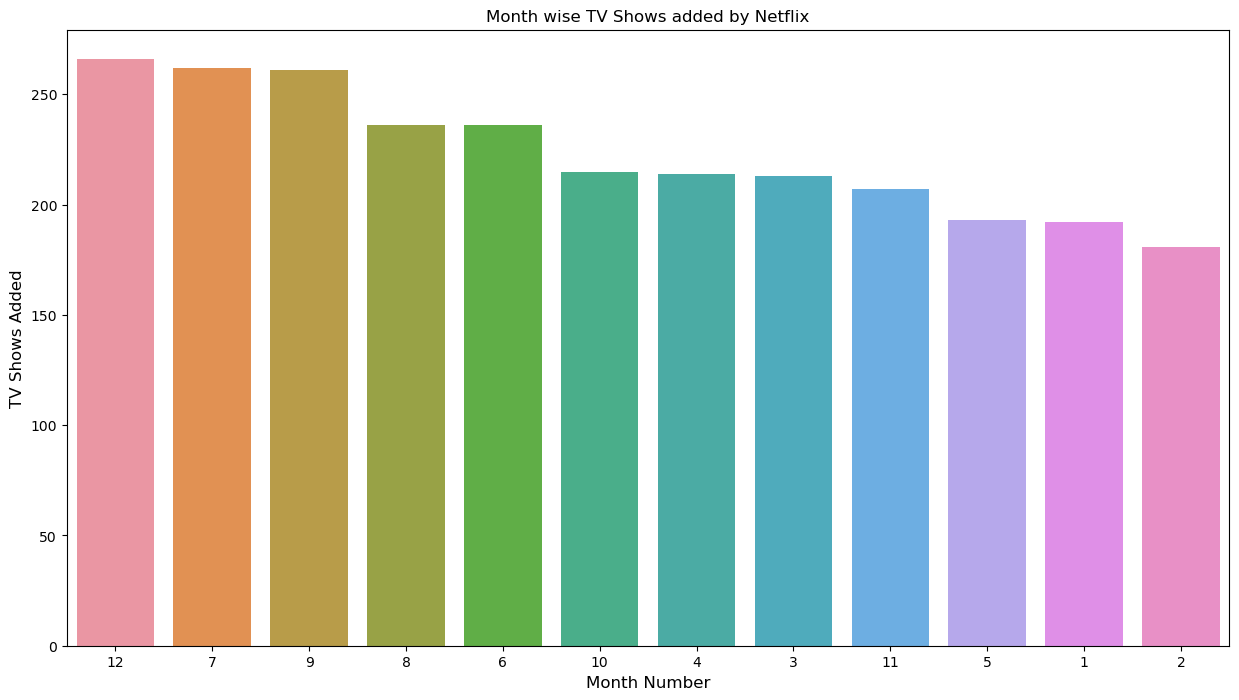

In [ ]:
# Graphical representation of best Month to release a TV Show.
plt.figure(figsize = (15,8))
sns.countplot(data = tv_data, x = "month_number", order = tv_data["month_number"].value_counts().index)
plt.title("Month wise TV Shows added by Netflix", fontsize = 12)
plt.xlabel("Month Number", fontsize = 12)
plt.ylabel("TV Shows Added", fontsize = 12)
plt.show()

### So After complete Analysis we can say the best time to launch a Movie is 1st week of year(January) & for TV Show launching best time is  27th week of year(July). As this is the time on which Netflix has prior added the maximum Movies and Tv Shows respectively.

# 4. Analysis of actors/directors of different types of shows/movies.

In [ ]:
# Creating a new data frame "data1" for this question's analysis.
data1= director_explode.merge(data[['show_id','type']], how = 'left', left_on = 'show_id', right_on = 'show_id')
data1.shape

(9612, 3)

In [ ]:
data1.head(3)

,show_id,director,type
0,s1,Kirsten Johnson,Movie
1,s2,Unknown director,TV Show
2,s3,Julien Leclercq,TV Show


#### Analysis for Movies & director

In [ ]:
# Creating a new dataframe only for movies.
data1_movie = data1[data1["type"] == "Movie"]

In [ ]:
data1_movie.head(3)

,show_id,director,type
0,s1,Kirsten Johnson,Movie
6,s7,Robert Cullen,Movie
7,s7,José Luis Ucha,Movie


In [ ]:
# Finding Count of movies produced by directors. (Method 1)
data1_movie.groupby("director")["show_id"].count().sort_values(ascending = False)

director
Unknown director    188
Rajiv Chilaka        22
Jan Suter            21
Raúl Campos          19
Suhas Kadav          16
                   ... 
Bob Rose              1
Jovanka Vuckovic      1
Bob Persichetti       1
Juan Antin            1
Mary Lambert          1
Name: show_id, Length: 4778, dtype: int64

In [ ]:
# Finding Count of movies produced by directors. (Method 2)
data1_movie["director"].value_counts()

Unknown director     188
Rajiv Chilaka         22
Jan Suter             21
Raúl Campos           19
Suhas Kadav           16
                    ... 
Vrinda Samartha        1
Nicholaus Goossen      1
Stig Bergqvist         1
Paul Demeyer           1
Mozez Singh            1
Name: director, Length: 4778, dtype: int64

#### By the Above analysis we can conclude Rajiv Chilaka directed maximum movies with count 22, followed by Jan Suter count 21.

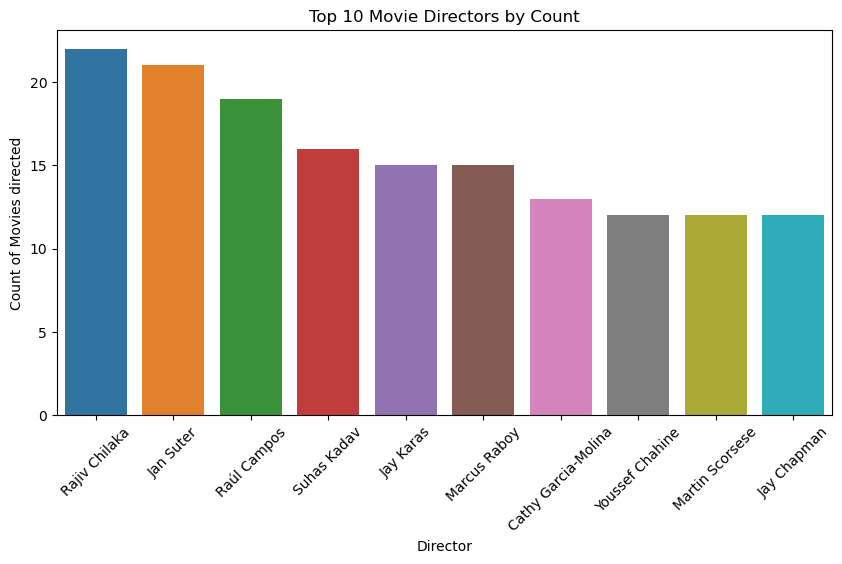

In [ ]:
# Graphical Representation of Directors with movie counts.

plt.figure(figsize = (10,5))
sns.countplot(data = data1_movie, x = "director", order = data1_movie["director"].value_counts().index[1:11])
# Skipping 1st row of unknown directors
plt.title("Top 10 Movie Directors by Count")
plt.xlabel("Director")
plt.ylabel("Count of Movies directed")
plt.xticks(rotation = 45)
plt.show()

#### Analysis for TV Shows & director

In [ ]:
# Creating a new dataframe only for TV Shows.
data1_tv = data1[data1["type"] == "TV Show"]

In [ ]:
data1_tv.head(3)

,show_id,director,type
1,s2,Unknown director,TV Show
2,s3,Julien Leclercq,TV Show
3,s4,Unknown director,TV Show


In [ ]:
# Finding Count of TV Shows produced by directors. (Method 1)
data1_tv.groupby("director")["show_id"].count().sort_values(ascending = False)

director
Unknown director       2446
Ken Burns                 3
Alastair Fothergill       3
Stan Lathan               2
Joe Berlinger             2
                       ... 
Houda Benyamina           1
Hong Won-ki               1
Hiroyuki Seshita          1
Hikaru Toda               1
Ziad Doueiri              1
Name: show_id, Length: 300, dtype: int64

In [ ]:
# Finding Count of Tv shows produced by directors. (Method 2)
data1_tv["director"].value_counts()

Unknown director         2446
Alastair Fothergill         3
Ken Burns                   3
Iginio Straffi              2
Gautham Vasudev Menon       2
                         ... 
Jesse Vile                  1
Ellena Wood                 1
Picky Talarico              1
Pedro Waddington            1
Michael Cumming             1
Name: director, Length: 300, dtype: int64

#### By the Above analysis we can conclude Alastair Fothergill, Ken Burns directed maximum TV Shows with count 3, maximum of TV Shows director were null , which were replaced by unknown director.

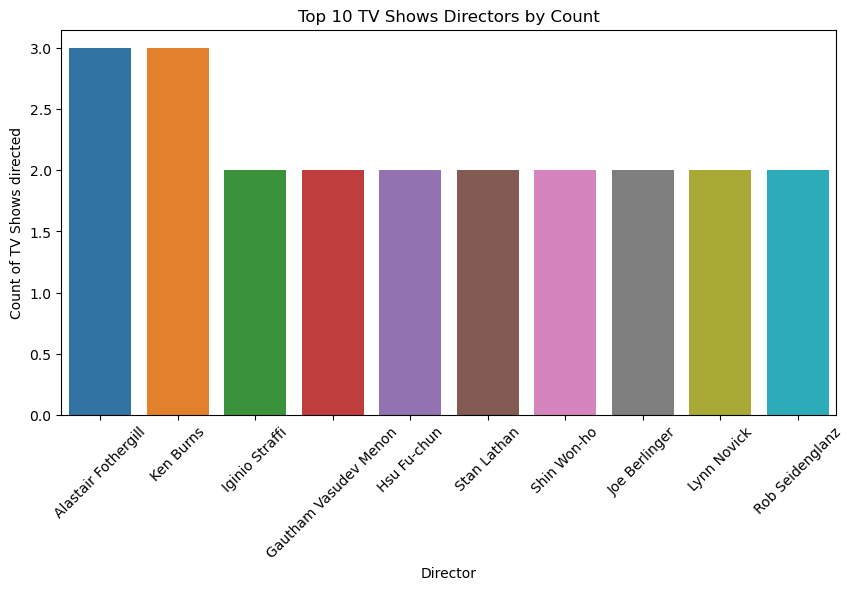

In [ ]:
# Graphical Representation of Directors with TV Shows counts.

plt.figure(figsize = (10,5))
sns.countplot(data = data1_tv, x = "director", order = data1_tv["director"].value_counts().index[1:11])
# Skipping 1st row of unknown directors
plt.title("Top 10 TV Shows Directors by Count")
plt.xlabel("Director")
plt.ylabel("Count of TV Shows directed")
plt.xticks(rotation = 45)
plt.show()

#### Analysis for actor/cast.

In [ ]:
# Creating a new data frame "data2" for this question's analysis.
data2= cast_explode.merge(data[['show_id','type']], how = 'left', left_on = 'show_id', right_on = 'show_id')
data2.shape

(64951, 3)

In [ ]:
data2.head(3)

,show_id,cast,type
0,s1,Unknown cast,Movie
1,s2,Ama Qamata,TV Show
2,s2,Khosi Ngema,TV Show


#### Analysis for actor & movies.

In [ ]:
# Creating a new dataframe only for movies.
data2_movie = data2[data2["type"] == "Movie"]

In [ ]:
data2_movie.shape

(44950, 3)

In [ ]:
# Finding Count of Actor present in movies. (Method 1)
data2_movie.groupby("cast")["show_id"].count().sort_values(ascending = False)

cast
Unknown cast        475
Anupam Kher          42
Shah Rukh Khan       35
Naseeruddin Shah     32
Om Puri              30
                   ... 
Jacob Craner          1
Jacob Buster          1
Jacob Blair           1
Jacob Bertrand        1
Ṣọpẹ́ Dìrísù          1
Name: show_id, Length: 25952, dtype: int64

#### By the Above analysis we can conclude Anupam kher was present in maximum movies with 42 times, followed by Shah Rukh Khan occuring 35 times.

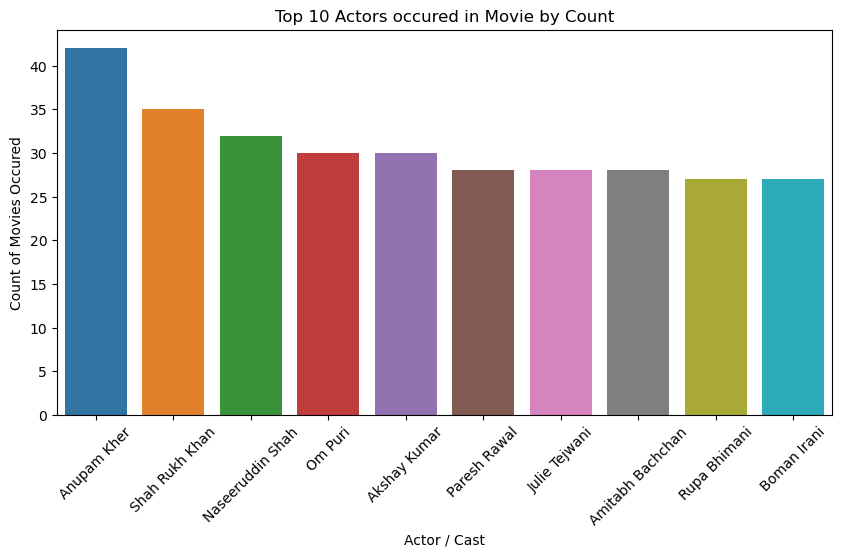

In [ ]:
# Graphical Representation of Actor/Cast with movie counts.

plt.figure(figsize = (10,5))
sns.countplot(data = data2_movie, x = "cast", order = data2_movie["cast"].value_counts().index[1:11])
# Skipping 1st row of unknown directors
plt.title("Top 10 Actors occured in Movie by Count")
plt.xlabel("Actor / Cast")
plt.ylabel("Count of Movies Occured")
plt.xticks(rotation = 45)
plt.show()

#### Analysis for actor & TV Shows

In [ ]:
# Creating a new dataframe only for TV Shows.
data2_tv = data2[data2["type"] == "TV Show"]

In [ ]:
data2_tv.shape

(20001, 3)

In [ ]:
# Finding Count of TV Shows produced by directors. (Method 1)
data2_tv.groupby("cast")["show_id"].count().sort_values(ascending = False)

cast
Unknown cast             350
Takahiro Sakurai          25
Yuki Kaji                 19
Daisuke Ono               17
Ai Kayano                 17
                        ... 
Iván Pellicer              1
Iván Álvarez de Araya      1
Iza Moreira                1
Izan Llunas                1
Şükrü Özyıldız             1
Name: show_id, Length: 14864, dtype: int64

#### By the Above analysis we can conclude Takahiro Sakurai was present in maximum TV Shows with 25 times, followed by Yuki Kaji occuring 19 times

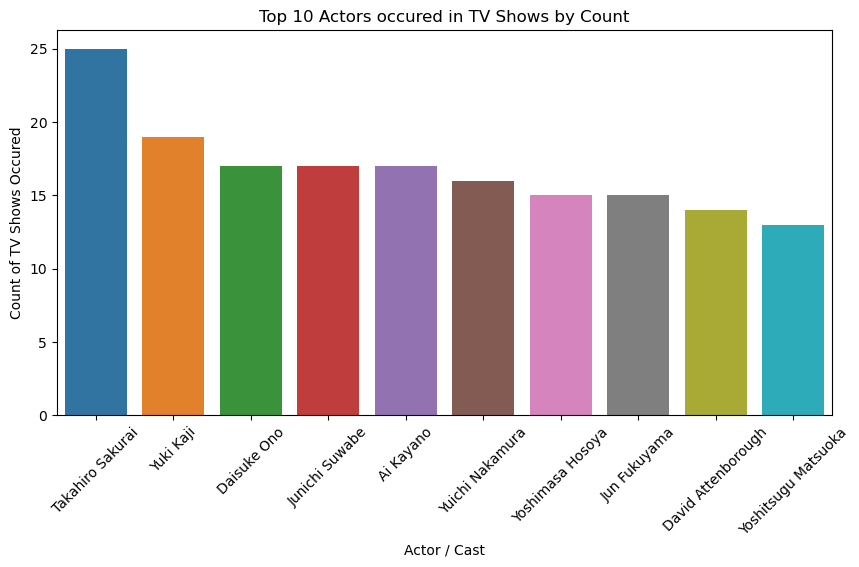

In [ ]:
# Graphical Representation of Actor / Cast with TV Shows counts.

plt.figure(figsize = (10,5))
sns.countplot(data = data2_tv, x = "cast", order = data2_tv["cast"].value_counts().index[1:11])
# Skipping 1st row of unknown directors
plt.title("Top 10 Actors occured in TV Shows by Count")
plt.xlabel("Actor / Cast")
plt.ylabel("Count of TV Shows Occured")
plt.xticks(rotation = 45)
plt.show()

# 5. Which genre movies are more popular or produced more

In [ ]:
listed_in_explode["listed_in"].value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

In [ ]:
listed_in_explode.groupby("listed_in").count().sort_values(by = "show_id", ascending = False)

,show_id
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


In [ ]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.8/159.8 kB 751.7 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


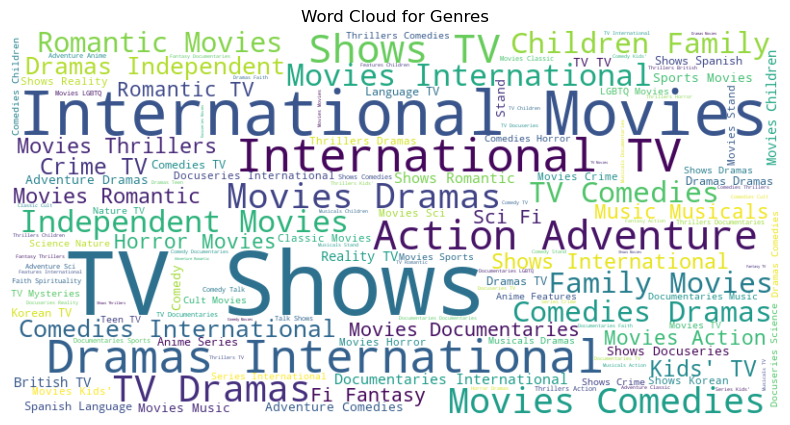

In [ ]:
# Generating a wordplot for Genre.
from wordcloud import WordCloud

# Assuming your DataFrame is named 'df'
# You can replace this with your actual DataFrame name

# Join all genre values into a single string
all_genres = ' '.join(listed_in_explode['listed_in'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap = 'viridis').generate(all_genres)

# Display the word cloud using matplotlib
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Genres')
plt.show()


#### By Word Plot analysis we can come on the conclusion that TV Shows and International Movies are most popular/produced.

# 6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

In [ ]:
# Calculate the difference between 'date_added' and 'release_year' to get the number of days difference.
movie_data["days_to_netflix"] = (movie_data["date_added"] - pd.to_datetime(movie_data["release_year"], format="%Y"))
movie_data["days_to_netflix"]

/var/folders/q0/swk7rgzd7lnc1_9sk90q3jt00000gn/T/ipykernel_19509/3184488229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data["days_to_netflix"] = (movie_data["date_added"] - pd.to_datetime(movie_data["release_year"], format="%Y"))


0        633 days
6        266 days
7      10493 days
9        266 days
12       265 days
          ...    
8801     433 days
8802    4706 days
8804    3956 days
8805    5123 days
8806    1521 days
Name: days_to_netflix, Length: 6131, dtype: timedelta64[ns]

In [ ]:
movie_data['difference_days'] = movie_data['days_to_netflix'].dt.days

# Calculate the mode of the days
mode_days = movie_data['difference_days'].mode()[0]

/var/folders/q0/swk7rgzd7lnc1_9sk90q3jt00000gn/T/ipykernel_19509/699941307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['difference_days'] = movie_data['days_to_netflix'].dt.days


334

In [ ]:
mode_days

334

#### After analysing the past data for movies, we came on conclusion that maximum movies were added after 334 days of release year.

In [ ]:
# Cross checking the above Analysis
movie_data["difference_days"].value_counts()

334     29
546     28
424     26
365     23
639     22
        ..
5541     1
3715     1
1525     1
2266     1
5123     1
Name: difference_days, Length: 2372, dtype: int64

## Finding Average duration of Movies

In [ ]:
# Creating a new data set for with only 2 columns
data5=data[['type','duration']]
data5

,type,duration
0,Movie,90 min
1,TV Show,2 Seasons
2,TV Show,1 Season
3,TV Show,1 Season
4,TV Show,2 Seasons
...,...,...
8802,Movie,158 min
8803,TV Show,2 Seasons
8804,Movie,88 min
8805,Movie,88 min


/var/folders/q0/swk7rgzd7lnc1_9sk90q3jt00000gn/T/ipykernel_19509/3830836647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['duration'] = data5['duration'].str.replace(' min', '').astype(float)


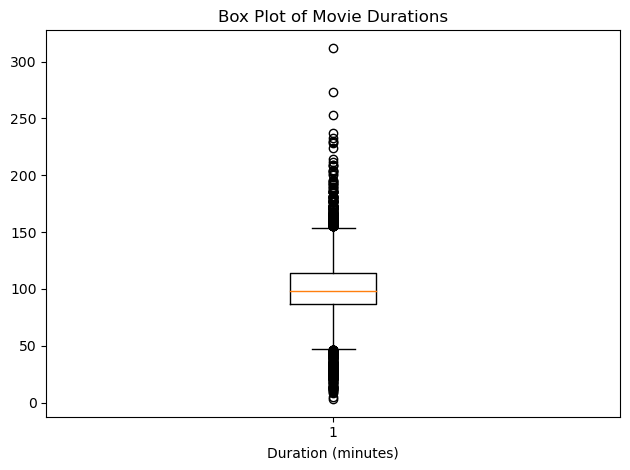

In [ ]:
# dataset for movies
data5 = data5[data5['type']=='Movie']
data5['duration'] = data5['duration'].str.replace(' min', '').astype(float)

# Create a box plot
#plt.figure(figsize=(8, 6))
plt.boxplot(data5['duration'], vert=True)
plt.xlabel('Duration (minutes)')
plt.title('Box Plot of Movie Durations')
plt.tight_layout()

# Show the box plot
plt.show()

#### So average duration for movies is 100 minutes.

### Average seasons for TV Shows

In [ ]:
# Creating a new data set for with only 2 columns
data6 = data[['type','duration']]

In [ ]:
data6 = data6[data6["type"] == "TV Show"]

In [ ]:
data6.value_counts()

type     duration  
TV Show  1 Season      1793
         2 Seasons      425
         3 Seasons      199
         4 Seasons       95
         5 Seasons       65
         6 Seasons       33
         7 Seasons       23
         8 Seasons       17
         9 Seasons        9
         10 Seasons       7
         13 Seasons       3
         11 Seasons       2
         12 Seasons       2
         15 Seasons       2
         17 Seasons       1
dtype: int64

#### So we can conclude maximum TV Show are having only 1 season, followed by 2 seasons.

# Insights:

1. There are a total of 8,807 rows and 12 columns in our dataset.

2. Many columns such as 'director,' 'cast,' 'country,' 'date_added,' 'rating,' and 'duration' have missing values, which we have handled appropriately.

3. In the 'duration' column, three missing values were mistakenly added to the 'rating' column. All three entries were directed by the same director. We relocated these values to the 'duration' column and labeled the 'rating' column as "unknown rating."

4. Columns like 'country,' 'cast,' 'director,' and 'listed_in' contained comma-separated values. To facilitate better analysis, we split and exploded these values.

5. Leading and trailing spaces in some columns were removed to eliminate ambiguity.

6. The United States leads with 3,690 entries, making it the top country with the most content (TV Shows / Movies), followed by India with 1,046 entries.

7. The dataset contains 6,131 movies and 2,676 TV Shows, indicating a greater number of movies compared to TV Shows.

8. TV-MA rating content (i.e., adult content) is the most common, followed by TV-14 rating content (i.e., suitable for ages 14+).

9. The dataset includes content from 1925 to 2021, with the most recent addition in 2021 and the oldest from 1925.

10. The first content added by Netflix was on "2008-01-01," and the most recent addition was on "2021-09-25."

11. From 2015 to 2019, there was exponential growth in content on Netflix.

12. The highest number of content additions occurred in 2019, followed by 2020, during the COVID-19 pandemic.

13. Content additions on Netflix declined after 2019.

14. The United States produced 2,752 titles, making it the top movie-producing country, followed by India with 952 titles.

15. The top country for TV shows is the United States with 938 titles, followed by United Kingdom, and Japan.

16. The best time to launch a movie is in the 1st week of the year (January), while for TV shows, the best time is in the 27th week of the year (July). These periods correspond to when Netflix added the most movies and TV shows, respectively.

17. Rajiv Chilaka directed the highest number of movies (22), followed by Jan Suter with 21.

18. Alastair Fothergill and Ken Burns directed the highest number of TV shows (3). There were also several TV shows with unknown directors, which we labeled as "unknown director."

19. Anupam Kher appeared in the highest number of movies (42 times), followed by Shah Rukh Khan with 35 appearances.

20. Takahiro Sakurai appeared in the highest number of TV shows (25 times), followed by Yuki Kaji with 19 appearances.

21. The most frequently produced genres are International Movies, Drama, and TV Shows.

22. Most movies were added to Netflix approximately 334 days after their release year.

23. The average duration for movies is approximately 100 minutes.

24. TV shows with only 1 season are the most common (793 shows), followed by shows with 2 seasons (425 shows).

# Recommendation :-

1. Diverse Content Acquisition: Continue diversifying the content library by sourcing titles from various countries and genres. Expanding international content can cater to a more global audience.

2. Content Quality Assurance: Implement a robust quality assurance process to prevent data entry errors, such as misclassifying movie durations as ratings. This ensures accurate metadata for titles.

3. Data Enrichment: Invest in data enrichment techniques to fill missing values and null values in critical columns like 'director' , 'country', 'cast', etc. Enhanced metadata improves search and recommendation engines.

4. Release Timing: Strategically plan content releases during peak periods. The data suggests that launching content in January for movies and July for TV shows aligns with Netflix's historical patterns.

5. Explore New Markets: Given the success of content from the United States and India, consider exploring more markets to tap into emerging viewer demographics.

6. Audience Segmentation: Utilize viewer data and preferences to segment the audience. Customized recommendations can lead to increased viewer satisfaction and retention.

7. Content Partnerships: Collaborate with top directors like Rajiv Chilaka and Jan Suter, who have a proven track record of successful titles on the platform.

8. Data-Driven Decision-Making: Leverage data analytics and machine learning to gain deeper insights into viewer behavior. This can inform content creation, recommendations, and marketing strategies.

9. Content Duration: Consider diversifying content durations, as the average movie duration is around 100 minutes. Offering shorter and longer content can cater to various viewer preferences. For TV Shows audience prefer short seasons shows, so producing accordingly.

10. Localized Content: Invest in producing and acquiring more localized content, as this can help penetrate markets with diverse languages and cultures.

11. Historical Analysis: Use historical data to predict trends and viewer preferences. Understanding viewer habits can guide content acquisition and creation.

12. Content Marketing: Promote the rich library of TV-MA and TV-14 content, which are highly popular. Engage audiences by highlighting these categories in marketing campaigns.

13. Popular Genres: Continue producing content in popular genres like Drama, International Movies, and TV Shows, but also consider investing in genres that show potential for growth based on viewership trends.

14. Accessibility: Continue efforts to make content accessible to viewers with diverse needs, including subtitles and dubbing in multiple languages.


#                                                THANK YOU !!